In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [3]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [4]:
%matplotlib inline
# %matplotlib notebook

# 1d case

In [5]:
fss = []
resolutions = [500, 1000, 2000]
for res in resolutions:
#     fs = h5py.File(f'BDNK/Shocktube1D/test1step/{str(res)}/data_serial_TIx_1.hdf5', 'r')
#     fs = h5py.File(f'BDNK/Shocktube1D/test2stepnoSS/{str(res)}/data_serial_TIx_9.hdf5', 'r')
    fs = h5py.File(f'BDNK/Shocktube1D/tes3/{str(res)}/data_serial_TIx_3.hdf5', 'r')
    fss.append(fs)
fss_all = []
for n in range(21):
    fs = h5py.File(f'BDNK/Shocktube1D/tes3/2000/data_serial_TIx_{str(n)}.hdf5', 'r')
    fss_all.append(fs)

In [5]:
fs['Auxiliary'].keys()

<KeysViewHDF5 ['A', 'Pi', 'T', 'Theta', 'W', 'a1', 'a2', 'a3', 'dWdt', 'dndt', 'dpdt', 'drhodt', 'dv1dt', 'dv2dt', 'dv3dt', 'e', 'h', 'pi00', 'pi01', 'pi02', 'pi03', 'pi11', 'pi12', 'pi13', 'pi22', 'pi23', 'pi33', 'q0', 'q1', 'q2', 'q3', 'qv', 'rho_plus_p', 'vsqrd']>

In [6]:
fss

[<HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
 <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
 <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>]

In [16]:
fss_all[0]['Domain/']

<HDF5 group "/Domain" (1 members)>

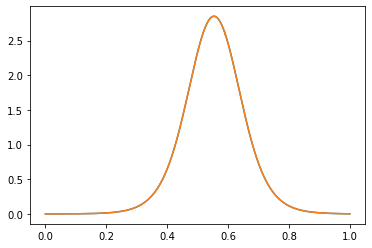

In [20]:
dvdt = []
dt = 5e-5
dvdt.append(fss_all[0]['Auxiliary/dv1dt'][:])
for n in range(len(fss_all)-1):
    dvdt.append((fss_all[n+1]['Primitive/v1'][:] - fss_all[n]['Primitive/v1'][:])/(dt))
#     plt.plot(fss_all[n]['Domain/x'],fss_all[n]['Auxiliary/dv1dt'][:])
#     plt.plot(fss_all[n]['Domain/x'],dvdt[n])
    # dvdt



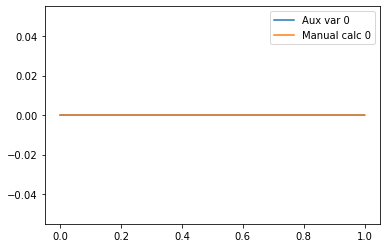

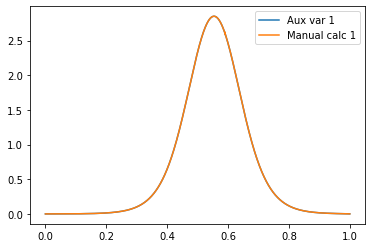

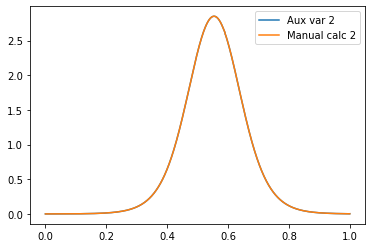

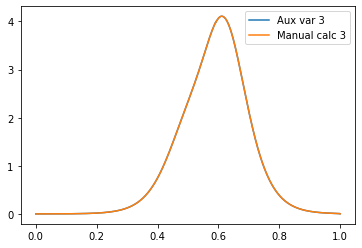

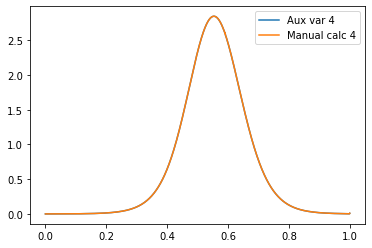

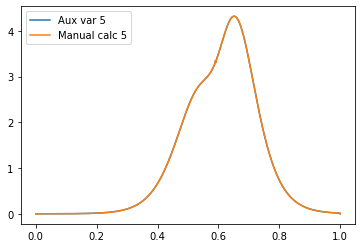

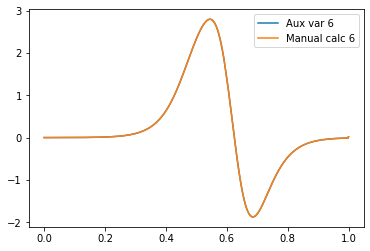

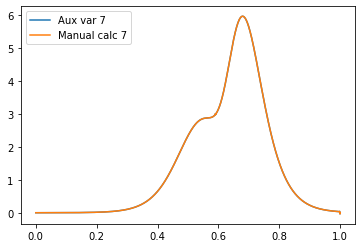

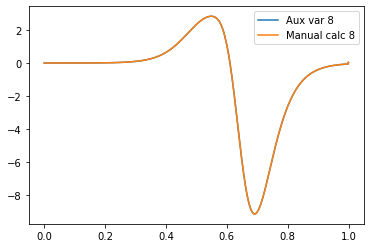

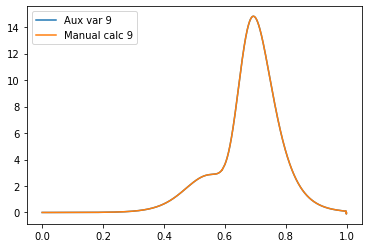

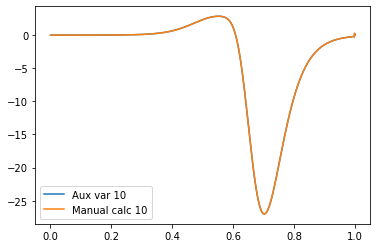

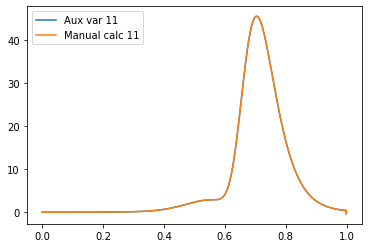

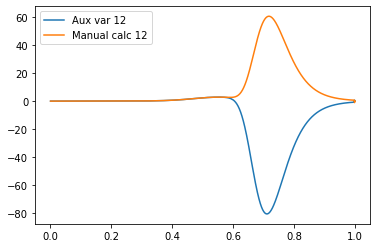

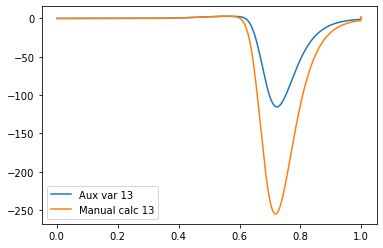

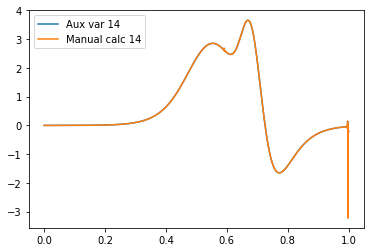

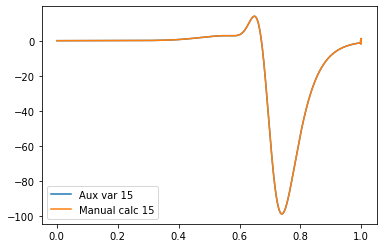

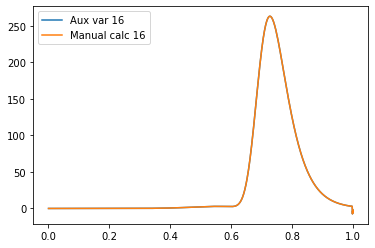

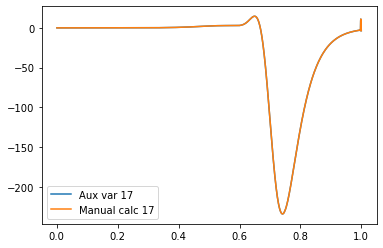

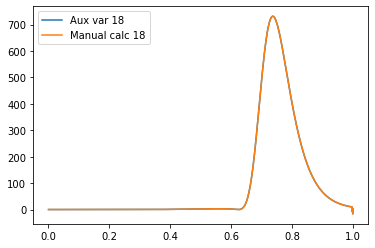

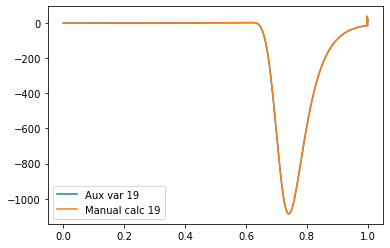

In [28]:
def dvdt_compare(n):
    plt.figure()
    plt.plot(fss_all[0]['Domain/x'],fss_all[n]['Auxiliary/dv1dt'][:],label='Aux var '+str(n))
    plt.plot(fss_all[0]['Domain/x'],dvdt[n],label='Manual calc '+str(n))
    plt.legend()
    plt.savefig('BDNK/dv1dt_progression/dvdt_'+str(n))
    plt.show()

for n in range(20):
    dvdt_compare(n)



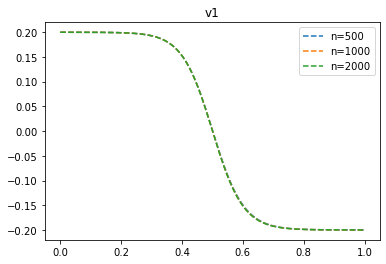

In [7]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
for quant in['v1']:
#     plt.figure()
    for res, fs in zip(resolutions, fss):
#         plt.figure()
        plt.plot(fs['Domain/x'], fs['Primitive/'+quant][:],'--',label=rf"n={res}")
#         plt.show()
    plt.title(quant)
    plt.legend()
#     plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


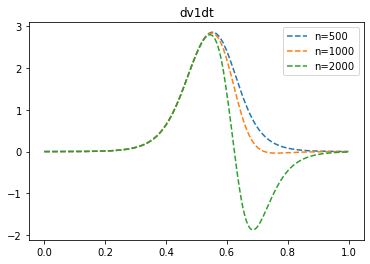

In [46]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
for quant in['dv1dt']:
#     plt.figure()
    for res, fs in zip(resolutions, fss):
#         plt.figure()
        plt.plot(fs['Domain/x'], fs['Auxiliary/'+quant][:],'--',label=rf"n={res}")
#         plt.show()
    plt.title(quant)
    plt.legend()
#     plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


In [45]:
for quant in['D','Tau','S1']:
    plt.figure()
    for n in range(n_files):
        #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(fs_IS[n]['Domain/x'][:], (fs_IS[n]['Conserved/'+quant][:] - fs_BDNK[n]['Conserved/'+quant][:])/fs_IS[n]['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.plot(fs_IS_ID[n]['Domain/x'][:], (fs_IS_ID[n]['Conserved/'+quant][:] - fs_BDNK[n]['Conserved/'+quant][:])/fs_IS_ID[n]['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/ConsRelDiff_"+quant+".pdf")
    plt.show()

NameError: name 'n_files' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    for fs, name in zip(fss, names):
        plt.plot(fs[-1]['Domain/x'], fs[-1]['Primitive/'+quant][:],label=name)#=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.plot(fs[0]['Domain/x'], fs[0]['Primitive/'+quant][:],label=name)#=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


In [ ]:
for quant in ['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    plt.plot(fss[0][-1]['Domain/x'], fss[0][-1]['Primitive/'+quant][:],label=names[0])
#     plt.plot(fss[1][-1]['Domain/x'], fss[1][-1]['Primitive/'+quant][:],label=names[1])
    plt.plot(fss[1][-1]['Domain/x'], fss[1][-1]['Auxiliary/'+quant][:],label=names[1])

#     plt.plot(fss[0][1]['Domain/x'], fss[0][1]['Auxiliary/'+quant][:],label=names[0])
#     #plt.plot(fss[1][-1]['Domain/x'], fss[1][-1]['Primitive/'+quant][:],label=names[1])
#     plt.plot(fss[1][1]['Domain/x'], fss[1][1]['Auxiliary/'+quant][:],label=names[1])

    plt.title(quant+' , '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")

In [ ]:
# for fs in fss:
#     for f in fs:
#         f.close()

In [ ]:
for quant in ['Theta']:
    plt.figure()
    plt.plot(fss[1][-1]['Domain/x'], fss[1][-1]['Auxiliary/'+quant][:],label=quant)
    plt.plot(fss[2][-1]['Domain/x'], fss[2][-1]['Auxiliary/'+quant][:],label=quant)
    plt.title(quant)
    plt.legend()
print(np.allclose(fss[2][-1]['Auxiliary/Theta'][:],0))
print(fss[2][-1]['Auxiliary/Theta'][:])

In [ ]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_BDNK[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Primitive/'+quant][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/PrimsRelDiff_"+quant+".pdf")
    plt.show()
    

In [ ]:
# for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
#     plt.figure()
#     #for f in fs:
#     fIS = fs_IS[-1]
#     fISCE = fs_ISCE[-1]
#     plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#     plt.title(quant+' - '+quant+'NS / '+quant)
#     plt.legend()
#     plt.savefig("ComparePlots/PrimsDiff_"+quant+".pdf")
#     plt.show()
    

In [ ]:
for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_BDNK[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant][:]),label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' - '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/PrimsAbsDiff_"+quant+".pdf")
    plt.show()
    

In [ ]:
for quant in ['T','a1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_BDNK:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Aux_"+quant+".pdf")
    plt.show()
